# EDA

## Big Mart Sales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('Train.csv')

## End Objective:

### To find out the sales of each product at a perticular store

#### Target Column : "Sales"

#### Remaining columns : Predictor variables

#### Predictor variable are those variables that help you predict the Target Value.

'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'

#### Univariate Analysis :
#### Numerical column : Histogram . shape of the data
#### Categorical column: Countplot


In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

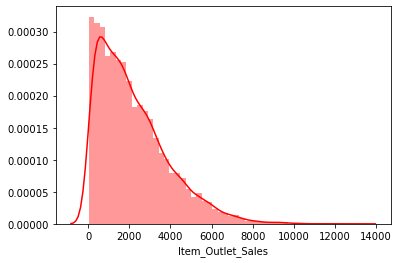

In [5]:
# Target variable
sns.distplot(train['Item_Outlet_Sales'],color='red')

In [6]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

### Target variable analysis

1. Higher sales is visible as the max sales recorded is of 13000.

2. Majority of the sales is in the of 33 to 800 approx

3. The median sale is captured at 1800 approx where as on an average the sale value is 2100

4. The max sale is 13086. I wish to explore this value

In [7]:
# max sale 13086
train[train.Item_Outlet_Sales==train.Item_Outlet_Sales.max()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


### Observation from max sale

1. Outlet 27 needs investigation

2. Multiple Items are purchased. It is combination of several items

3. This gives an inclination on MRP. MRP as appears is a consolidated MRP of several  items

In [8]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
train['Item_Fat_Content'].replace(to_replace='LF',value='Low Fat',inplace=True)
train['Item_Fat_Content'].replace(to_replace='low fat',value='Low Fat',inplace=True)
train['Item_Fat_Content'].replace(to_replace='reg',value='Regular',inplace=True)

In [10]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

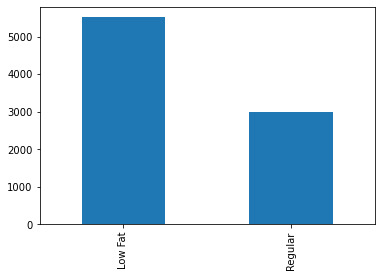

In [11]:
train['Item_Fat_Content'].value_counts().plot(kind='bar')

### Bivariate Analysis

#### It is always done between Target Variable and predictor variable

Text(0.5, 1.0, 'scatterplot - sales vs MRP ')

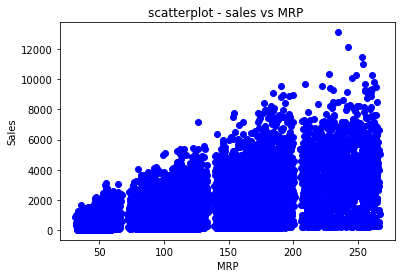

In [12]:
# scatter plot between "item Mrp" and 'Sale'

plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'],color='blue')
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.title('scatterplot - sales vs MRP ')

### Inference
#### In the scatter plot of mrp vs sale . The MRp is combined and we can extract/create a new variable Price per unit
#### Price_per_unit = mrp/ weight

Text(0.5, 1.0, 'scatterplot - sales vs weight ')

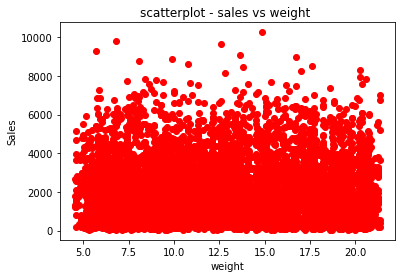

In [13]:
plt.scatter(train['Item_Weight'],train['Item_Outlet_Sales'],color='red')
plt.xlabel('weight')
plt.ylabel('Sales')
plt.title('scatterplot - sales vs weight ')

#### There is no pattern found between Item_weight vs sales

Text(0.5, 1.0, 'scatterplot - sales vs Item_Visibility ')

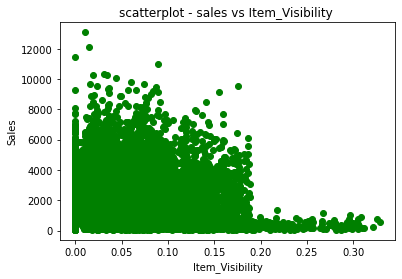

In [14]:
plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'],color='green')
plt.xlabel('Item_Visibility')
plt.ylabel('Sales')
plt.title('scatterplot - sales vs Item_Visibility ')

### Inference
#### 1. In visibility vs sale , the highly visible items have lesser sale
#### 2. Lot of sale is captured at 0 vissibility. This appears to be anamolous. Hence it need fixing

In [15]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:>

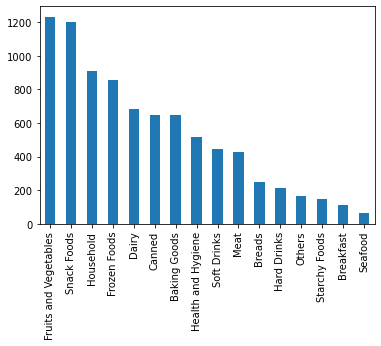

In [16]:
train.Item_Type.value_counts().plot(kind='bar')

# Top 5 items identified are
# 1. Fruits and Vegetables 2. Snack Foods 3. Household 4.Frozen Foods 5.Dairy            

In [17]:
### Statistical summary of Item type

train.groupby('Item_Type')['Item_Outlet_Sales'].describe().sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Snack Foods,1200.0,2277.321739,1705.121755,33.9558,918.80400,1944.1360,3143.57470,10993.6896
Household,910.0,2258.784300,1692.245757,33.2900,853.38915,1981.4208,3236.78670,13086.9648
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362
Soft Drinks,445.0,2006.511735,1674.249752,33.2900,771.66220,1518.0240,2759.07520,9554.2300


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

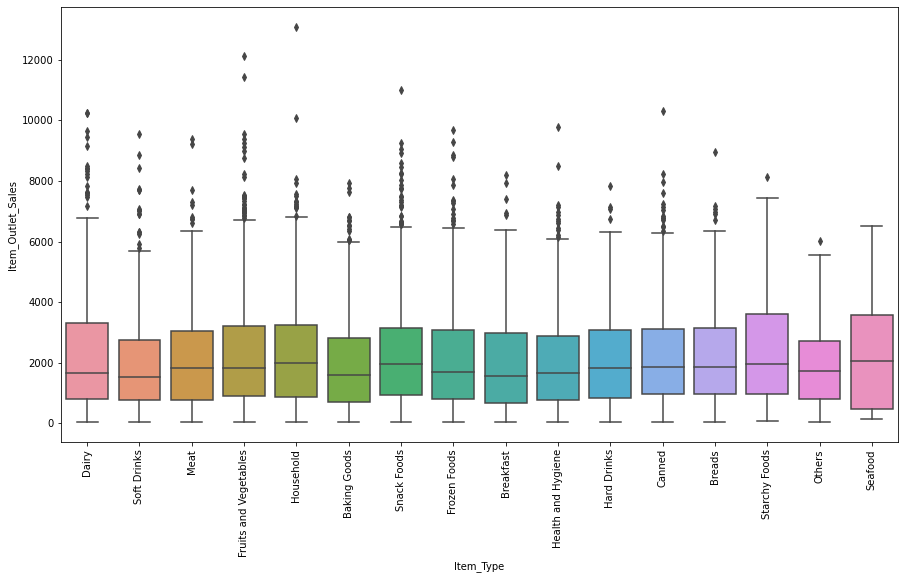

In [18]:
# Plot between Item type and sale  
plt.figure(figsize=[15,8])
sns.boxplot(x=train['Item_Type'],y=train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

In [19]:
# Missing values

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
# Outlet size
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

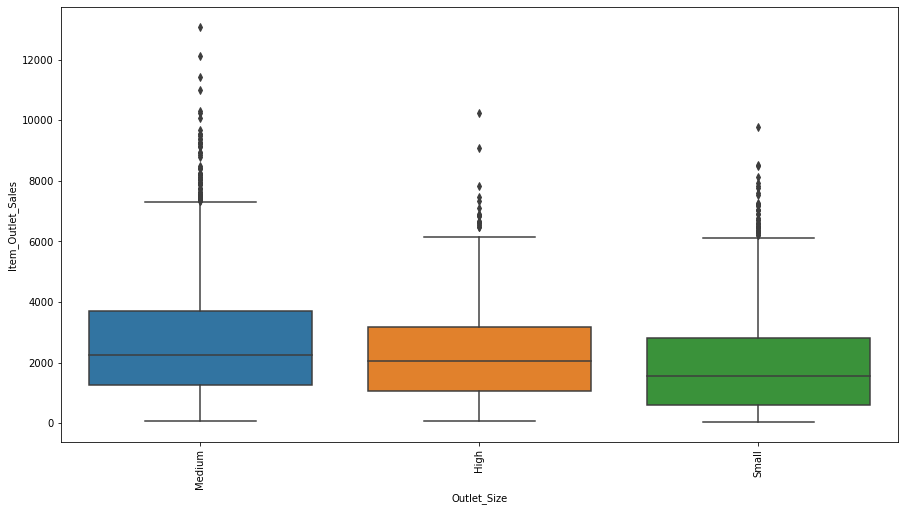

In [21]:
# Plot between Outlet size and sale  
plt.figure(figsize=[15,8])
sns.boxplot(x=train['Outlet_Size'],y=train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

In [22]:
# Filling Mediam in outlet_size
train['Outlet_Size'].fillna(value="Medium",inplace=True)

In [23]:
train[['Item_Weight','Item_Identifier']].value_counts()

Item_Weight  Item_Identifier
13.650       FDP28              8
5.780        FDL58              8
20.600       FDG09              8
14.700       FDG57              8
8.500        FDW13              8
                               ..
12.800       FDZ50              1
5.400        NCT53              1
7.685        NCU29              1
18.000       FDC23              1
6.520        FDE38              1
Length: 1555, dtype: int64

<AxesSubplot:xlabel='Item_Weight'>

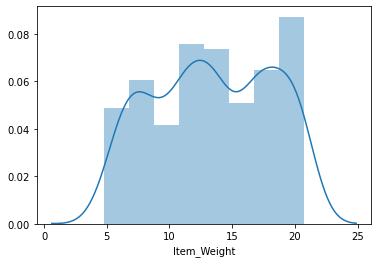

In [24]:
# lets find out Item waight of daily products

sns.distplot(train[train.Item_Type=='Dairy']['Item_Weight'].dropna())

In [25]:
# Take Item id and find pattern with weight

train[train['Item_Identifier']=='FDA15']['Item_Weight'] 

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    NaN
7543    9.3
Name: Item_Weight, dtype: float64

In [26]:
# Refil the NaN values in the Item_Weight column based on Item_Identifier -- Every Item Identifier has a same weight

In [27]:
train['Item_Weight']=train.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

In [28]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
train['Price_per_unit']=train['Item_MRP']/train['Item_Weight']

In [30]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


In [31]:
train['Item_Id']=train['Item_Identifier'].str[:2]

In [32]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_unit,Item_Id
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC


In [33]:
perishables=['Dairy','Meat', 'Fruits and Vegetables','Breakfast','Breads', 'Starchy Foods', 'Seafood']

In [34]:
def perish(x):
    if x in perishables:
        return('Perishables')
    else:
        return('Non Perishables')

In [35]:
train['Item_Type_cat']=train['Item_Type'].apply(perish)

In [36]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_unit,Item_Id,Item_Type_cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR,Non Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD,Perishables
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,FD,Perishables
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC,Non Perishables


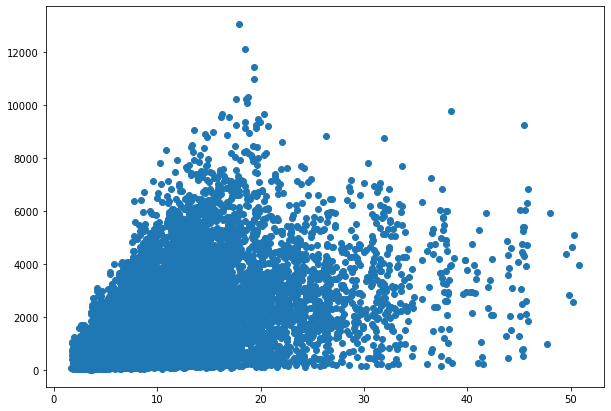

In [37]:
# Lets Plot Price vs Sale
plt.figure(figsize=[10,7])
plt.scatter(train['Price_per_unit'],train['Item_Outlet_Sales'])

In [39]:
train['Outlet_vintage']=2013 - train['Outlet_Establishment_Year']

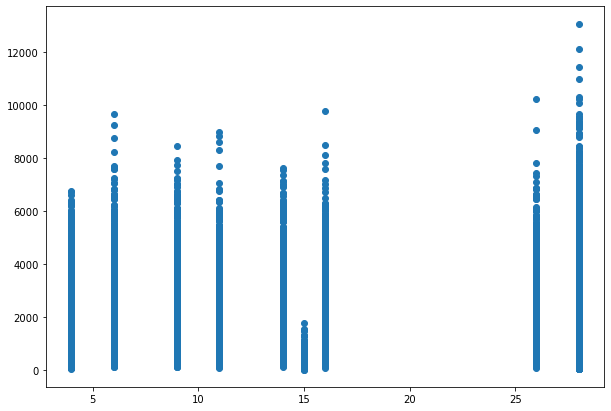

In [42]:
plt.figure(figsize=[10,7])
plt.scatter(train['Outlet_vintage'],train['Item_Outlet_Sales'])

In [43]:
train=train.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)

In [45]:
train=train.drop('Outlet_Identifier',axis=1)

In [46]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_unit,Item_Id,Item_Type_cat,Outlet_vintage
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD,Perishables,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR,Non Perishables,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD,Perishables,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,9.484115,FD,Perishables,15
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC,Non Perishables,26


In [47]:
# Applying One hot Encodeing on Item_Type

train_dummy=pd.get_dummies(train)

In [48]:
train_dummy.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Price_per_unit,Outlet_vintage,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Id_DR,Item_Id_FD,Item_Id_NC,Item_Type_cat_Non Perishables,Item_Type_cat_Perishables
0,9.30,0.016047,249.8092,3735.1380,26.861204,14,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,5.92,0.019278,48.2692,443.4228,8.153581,4,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,8.092457,14,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,19.20,0.000000,182.0950,732.3800,9.484115,15,0,1,0,0,...,1,1,0,0,0,0,1,0,0,1
4,8.93,0.000000,53.8614,994.7052,6.031512,26,1,0,0,0,...,1,0,1,0,0,0,0,1,1,0


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

In [54]:
scaled_train=pd.DataFrame(sc.fit_transform(train_dummy),columns=train_dummy.columns)

In [55]:
scaled_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Price_per_unit,Outlet_vintage,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Id_DR,Item_Id_FD,Item_Id_NC,Item_Type_cat_Non Perishables,Item_Type_cat_Perishables
0,-0.828408,-0.970732,1.747454,0.910601,1.895649,-0.139541,0.738147,-0.738147,-0.286855,-0.174193,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.388112,1.388112
1,-1.625364,-0.908111,-1.489023,-1.018440,-0.568325,-1.334103,-1.354743,1.354743,-0.286855,-0.174193,...,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558,0.720403,-0.720403
2,1.105037,-0.956917,0.010040,-0.049238,-0.576375,-0.139541,0.738147,-0.738147,-0.286855,-0.174193,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.388112,1.388112
3,1.505873,-1.281758,0.660050,-0.849103,-0.393080,-0.020085,-1.354743,1.354743,-0.286855,-0.174193,...,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.388112,1.388112
4,-0.915649,-1.281758,-1.399220,-0.695373,-0.847821,1.293934,0.738147,-0.738147,-0.286855,-0.174193,...,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915,0.720403,-0.720403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.402547,-0.181193,1.180783,0.349915,2.473514,1.293934,0.738147,-0.738147,-0.286855,-0.174193,...,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,0.720403,-0.720403
8519,-1.045331,-0.371154,-0.527301,-0.956402,0.057689,-0.497909,-1.354743,1.354743,3.486083,-0.174193,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,0.720403,-0.720403
8520,-0.521886,-0.599784,-0.897208,-0.579100,-0.584547,-0.736822,0.738147,-0.738147,-0.286855,-0.174193,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915,0.720403,-0.720403
8521,-1.321200,1.532880,-0.607977,-0.196725,0.241770,-1.334103,-1.354743,1.354743,-0.286855,-0.174193,...,1.242650,-0.381529,-1.375891,2.860816,-0.351028,-0.321627,0.625708,-0.480558,0.720403,-0.720403
